# **Imports and defined functions**

In [1]:
# Libraries for data wrangling
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Libraries for metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Libararies for feature selection
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

# Libararies for ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier

In [2]:
def modelling_and_evaluation(classifier, X_train, X_test, y_train, y_test, show_percentage = False):
    """
        This function trains a machine learning model based on scikit-learn functionality, 
        makes confusion matrix and classification report on test values

            Parameters:
                classifier(sklearn.method): scikit-learn model to evaluate. Exaple: RandomForestClassifier()
                X_train(pd.DataFrame): Train sample
                X_test(pd.DataFrame): Test sample
                y_train(pd.DataFrame): Train target
                y_test(pd.DataFrame): Test target
                show_percentage(bool): parameter to plot confusion matrix with perecentages. By default - False

            Returns: confusion matrix, accuracy score and classification report
                

    """
    classifier = classifier
    classifier.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    if show_percentage == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # для вычисления в процентном соотношении
    sns.heatmap(cm, annot = True, fmt='.4g')
    
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))
    
    print(classification_report(y_test, y_pred, digits = 5))

    return classifier, accuracy

# **Feature Selection**

## **Data preparation**

Импорт набора данных и подготовка его к моделированию

In [3]:
path = "C\\data\\data_balanced_wrangled.csv"
data = pd.read_csv(path)

In [72]:
#Creating the dependent variable class
factor = pd.factorize(data['health'])
data.health = factor[0]
definitions = factor[1]
print(data.health.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: health, dtype: int64
Index(['Good', 'Fair', 'Poor'], dtype='object')


In [73]:
X = data.iloc[:, :-1]
y = data['health']

In [74]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

## **Feature Selection**

Данный этап будет включать три основных метода:
- Permutation Importance;
- Random Forest Feature Importance;
- XGBoost Feature Importance.

Permutation Importance перемешивает данные одного столбца в наборе данных, оставивляя все остальные столбцы нетронутыми. Признак считается «важным», если точность модели падает и его изменение вызывает увеличение ошибок. С другой стороны, признак считается «неважным», если перетасовка его значений не влияет на точность модели.

Random Forest Feature Importance считает наиболее важными те признаки, которые уменьшают "загрязненость" исходного набора. Т.е. тем лучше признак подходит для разделения классов, тем лучше он "очищает" набор данных. И наоборот.

XGBoost Feature Importance считает, сколько раз и какой результат давало использование признака при обучении. Тем больше раз признак использовался и чем больше был эффект, тем он важнее.

### **Random Forest Feature Importance**

Accuracy: 0.5425355613865488
              precision    recall  f1-score   support

           0    0.54556   0.59776   0.57047      4828
           1    0.45903   0.42946   0.44375      4827
           2    0.61976   0.60037   0.60991      4827

    accuracy                        0.54254     14482
   macro avg    0.54145   0.54253   0.54138     14482
weighted avg    0.54145   0.54254   0.54138     14482



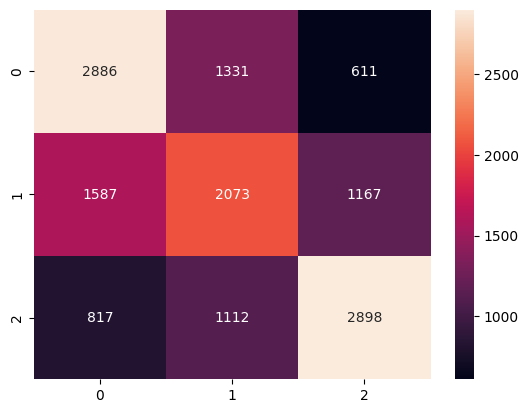

In [75]:
clf_rand_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
clf_rand_forest, accuracy_rand_forest = modelling_and_evaluation(clf_rand_forest, X_train, X_test, y_train, y_test)

In [76]:
random_forest_importances = clf_rand_forest.feature_importances_

random_forest_features = pd.DataFrame({'feature' : X.columns, 'Importances_Rand_Forest' : random_forest_importances})
random_forest_features['Rank_Rand_Forest'] = random_forest_features['Importances_Rand_Forest'].sort_values(ascending = False).rank(ascending = False)

random_forest_features.sort_values('Importances_Rand_Forest', ascending = False)

,feature,Importances_Rand_Forest,Rank_Rand_Forest
0,haversine_manhattan_distance_to_poor_tree,0.216912,1.0
1,tree_dbh_wrangled,0.122274,2.0
25,sidewalk_NoDamage,0.024981,3.0
14,has_TreesCount Staff_user_type,0.024561,4.0
50,zip_city_pca_component_4,0.024542,5.0
51,zip_city_pca_component_5,0.024200,6.0
47,zip_city_pca_component_1,0.023885,7.0
49,zip_city_pca_component_3,0.023854,8.0
48,zip_city_pca_component_2,0.023399,9.0
54,nta_name_pca_component_3,0.022720,10.0


### **XGBoost Feature Importance**

Accuracy: 0.5632509321916862
              precision    recall  f1-score   support

           0    0.55489   0.69408   0.61673      4828
           1    0.47460   0.40253   0.43560      4827
           2    0.65831   0.59312   0.62402      4827

    accuracy                        0.56325     14482
   macro avg    0.56260   0.56324   0.55878     14482
weighted avg    0.56260   0.56325   0.55879     14482



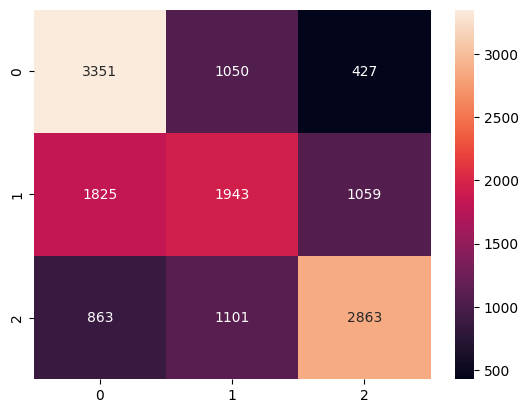

In [77]:
xgb = XGBClassifier(n_estimators = 100)
xgb_model, accuracy_xgb = modelling_and_evaluation(xgb, X_train, X_test, y_train, y_test)

In [78]:
xgb_importances = pd.DataFrame.from_dict(xgb_model.get_booster().get_score(importance_type = 'gain'), orient = 'index')

xgb_features = pd.DataFrame({'feature' : xgb_importances.index, 'Importances_XGB' : xgb_importances[0]}).reset_index(drop = True)
xgb_features['Rank_XGB'] = xgb_features['Importances_XGB'].sort_values(ascending = False).rank(ascending = False)
xgb_features.sort_values('Importances_XGB', ascending = False)

,feature,Importances_XGB,Rank_XGB
5,has_BranchOther_problem,21.738111,1.0
4,has_TrunkOther_problem,15.109328,2.0
14,has_Queens_borough,13.140956,3.0
39,problems_pca_component_4,8.926843,4.0
37,problems_pca_component_2,8.878441,5.0
0,haversine_manhattan_distance_to_poor_tree,7.684048,6.0
15,has_Brooklyn_borough,7.412328,7.0
49,zip_city_pca_component_4,6.746220,8.0
2,problems_count,6.646815,9.0
27,spc_common_pca_component_1,6.053378,10.0


### **Permutation Importance**

In [79]:
perm = PermutationImportance(clf_rand_forest).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0619 ± 0.0051,haversine_manhattan_distance_to_poor_tree
0.0295 ± 0.0033,tree_dbh_wrangled
0.0220 ± 0.0059,problems_count
0.0191 ± 0.0039,problems_pca_component_2
0.0167 ± 0.0026,problems_pca_component_4
0.0166 ± 0.0024,has_BranchOther_problem
0.0164 ± 0.0003,has_TrunkOther_problem
0.0164 ± 0.0036,has_problem
0.0099 ± 0.0023,has_TreesCount Staff_user_type
0.0075 ± 0.0033,has_Queens_borough


In [81]:
permutation = eli5.formatters.as_dataframe.explain_weights_df(perm, feature_names = X.columns.tolist())
permutation['rank'] = permutation['weight'].rank(ascending = False)
permutation['weight'] = permutation['weight'].round(4)

permutation

,feature,weight,std,rank
0,haversine_manhattan_distance_to_poor_tree,0.0619,0.002533,1.0
1,tree_dbh_wrangled,0.0295,0.001662,2.0
2,problems_count,0.0220,0.002947,3.0
3,problems_pca_component_2,0.0191,0.001948,4.0
4,problems_pca_component_4,0.0167,0.001277,5.0
5,has_BranchOther_problem,0.0166,0.001209,6.0
6,has_TrunkOther_problem,0.0164,0.000147,7.5
7,has_problem,0.0164,0.001778,7.5
8,has_TreesCount Staff_user_type,0.0099,0.001157,9.0
9,has_Queens_borough,0.0075,0.001670,10.0


### **Комбинация результатов**

In [92]:
combined_results = permutation.merge(random_forest_features, on = 'feature').merge(xgb_features, on = 'feature')
combined_results['Rank_Mean'] = ((combined_results['rank'] + combined_results['Rank_Rand_Forest'] + combined_results['Rank_XGB']) / 3).round(1)

combined_results[['feature', 'weight', 'std', 'rank', 'Rank_Rand_Forest', 'Rank_XGB', 'Rank_Mean']].sort_values('weight', ascending = False)

,feature,weight,std,rank,Rank_Rand_Forest,Rank_XGB,Rank_Mean
0,haversine_manhattan_distance_to_poor_tree,0.0619,0.002533,1.0,1.0,6.0,2.7
1,tree_dbh_wrangled,0.0295,0.001662,2.0,2.0,22.0,8.7
2,problems_count,0.0220,0.002947,3.0,30.0,9.0,14.0
3,problems_pca_component_2,0.0191,0.001948,4.0,16.0,5.0,8.3
4,problems_pca_component_4,0.0167,0.001277,5.0,18.0,4.0,9.0
5,has_BranchOther_problem,0.0166,0.001209,6.0,34.0,1.0,13.7
6,has_TrunkOther_problem,0.0164,0.000147,7.5,41.0,2.0,16.8
7,has_TreesCount Staff_user_type,0.0099,0.001157,9.0,4.0,30.0,14.3
8,has_Queens_borough,0.0075,0.001670,10.0,32.0,3.0,15.0
9,problems_pca_component_5,0.0060,0.002011,11.0,20.0,28.0,19.7


Поля, отобранные методом "Feature Permutation":

In [96]:
list(combined_results.sort_values('weight', ascending = False).feature[:28])

['haversine_manhattan_distance_to_poor_tree',
 'tree_dbh_wrangled',
 'problems_count',
 'problems_pca_component_2',
 'problems_pca_component_4',
 'has_BranchOther_problem',
 'has_TrunkOther_problem',
 'has_TreesCount Staff_user_type',
 'has_Queens_borough',
 'problems_pca_component_5',
 'has_Staten Island_borough',
 'problems_pca_component_3',
 'sidewalk_NoDamage',
 'has_1or2_steward',
 'has_Brooklyn_borough',
 'has_Annadale-Huguenot-Prince Bay-Eltingville_nta_name',
 'has_Bronx_borough',
 'curb_loc_OnCurb',
 'has_RootOther_problem',
 'has_Ridgewood_nta_name',
 'has_Bayside-Bayside Hills_nta_name',
 'address_pca_component_1',
 'spc_common_pca_component_2',
 'has_East New York_nta_name',
 'has_Harmful_guards',
 'trnk_light_Yes',
 'has_BranchLights_problem',
 'brch_shoe_Yes']

In [108]:
combined_results[['feature', 'weight', 'std', 'rank', 'Importances_Rand_Forest', 'Rank_Rand_Forest', 'Rank_Mean']].sort_values('Rank_Rand_Forest')

,feature,weight,std,rank,Importances_Rand_Forest,Rank_Rand_Forest,Rank_Mean
0,haversine_manhattan_distance_to_poor_tree,0.0619,0.002533,1.0,0.216912,1.0,2.7
1,tree_dbh_wrangled,0.0295,0.001662,2.0,0.122274,2.0,8.7
12,sidewalk_NoDamage,0.0029,0.001193,14.0,0.024981,3.0,19.0
7,has_TreesCount Staff_user_type,0.0099,0.001157,9.0,0.024561,4.0,14.3
39,zip_city_pca_component_4,-0.0020,0.001386,41.0,0.024542,5.0,18.0
41,zip_city_pca_component_5,-0.0027,0.000404,43.0,0.024200,6.0,30.7
47,zip_city_pca_component_1,-0.0041,0.001377,49.0,0.023885,7.0,24.0
43,zip_city_pca_component_3,-0.0029,0.001208,45.0,0.023854,8.0,25.7
36,zip_city_pca_component_2,-0.0007,0.001522,38.0,0.023399,9.0,20.7
38,nta_name_pca_component_3,-0.0020,0.001041,40.0,0.022720,10.0,24.3


Поля, отобранные алгоритмом "Random Forest Feature Importance":

In [110]:
list(combined_results.sort_values('Rank_Rand_Forest').feature[:30])

['haversine_manhattan_distance_to_poor_tree',
 'tree_dbh_wrangled',
 'sidewalk_NoDamage',
 'has_TreesCount Staff_user_type',
 'zip_city_pca_component_4',
 'zip_city_pca_component_5',
 'zip_city_pca_component_1',
 'zip_city_pca_component_3',
 'zip_city_pca_component_2',
 'nta_name_pca_component_3',
 'nta_name_pca_component_1',
 'nta_name_pca_component_4',
 'nta_name_pca_component_5',
 'nta_name_pca_component_2',
 'has_1or2_steward',
 'problems_pca_component_2',
 'spc_common_pca_component_2',
 'problems_pca_component_4',
 'spc_common_pca_component_1',
 'problems_pca_component_5',
 'spc_common_pca_component_3',
 'problems_pca_component_3',
 'spc_common_pca_component_5',
 'spc_common_pca_component_10',
 'spc_common_pca_component_4',
 'spc_common_pca_component_6',
 'spc_common_pca_component_9',
 'spc_common_pca_component_8',
 'spc_common_pca_component_7',
 'problems_count']

In [112]:
combined_results[['feature', 'weight', 'std', 'rank', 'Importances_XGB', 'Rank_XGB', 'Rank_Mean']].sort_values('Rank_XGB')

,feature,weight,std,rank,Importances_XGB,Rank_XGB,Rank_Mean
5,has_BranchOther_problem,0.0166,0.001209,6.0,21.738111,1.0,13.7
6,has_TrunkOther_problem,0.0164,0.000147,7.5,15.109328,2.0,16.8
8,has_Queens_borough,0.0075,0.001670,10.0,13.140956,3.0,15.0
4,problems_pca_component_4,0.0167,0.001277,5.0,8.926843,4.0,9.0
3,problems_pca_component_2,0.0191,0.001948,4.0,8.878441,5.0,8.3
0,haversine_manhattan_distance_to_poor_tree,0.0619,0.002533,1.0,7.684048,6.0,2.7
14,has_Brooklyn_borough,0.0012,0.000838,16.0,7.412328,7.0,19.3
39,zip_city_pca_component_4,-0.0020,0.001386,41.0,6.746220,8.0,18.0
2,problems_count,0.0220,0.002947,3.0,6.646815,9.0,14.0
46,spc_common_pca_component_1,-0.0041,0.000899,48.0,6.053378,10.0,25.7


Поля, отобранные алгоритмом "XGBoost Feature Importance":

In [113]:
list(combined_results.sort_values('Rank_XGB').feature[:30])

['has_BranchOther_problem',
 'has_TrunkOther_problem',
 'has_Queens_borough',
 'problems_pca_component_4',
 'problems_pca_component_2',
 'haversine_manhattan_distance_to_poor_tree',
 'has_Brooklyn_borough',
 'zip_city_pca_component_4',
 'problems_count',
 'spc_common_pca_component_1',
 'spc_common_pca_component_5',
 'problems_pca_component_3',
 'has_Staten Island_borough',
 'has_Bronx_borough',
 'zip_city_pca_component_2',
 'zip_city_pca_component_1',
 'has_BranchLights_problem',
 'has_RootOther_problem',
 'spc_common_pca_component_2',
 'spc_common_pca_component_3',
 'spc_common_pca_component_7',
 'tree_dbh_wrangled',
 'nta_name_pca_component_3',
 'zip_city_pca_component_3',
 'has_Ridgewood_nta_name',
 'spc_common_pca_component_9',
 'has_Annadale-Huguenot-Prince Bay-Eltingville_nta_name',
 'problems_pca_component_5',
 'nta_name_pca_component_2',
 'has_TreesCount Staff_user_type']